<a href="https://colab.research.google.com/github/Nityom/AIML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import random
import prettytable

In [2]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import os # accessing directory structure
import matplotlib.pyplot as mp

import seaborn as sb
# test classification dataset
from sklearn.datasets import make_classification

# test regression dataset
from sklearn.datasets import make_regression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path copied = /content/drive/MyDrive/train.csv
training_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [6]:
testing_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [7]:
training_data.shape

(1338, 7)

In [8]:
testing_data.shape

(1338, 7)

In [9]:
training_data.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
null_check = pd.isnull(training_data["bmi"])
null_team_data = training_data[null_check]

In [12]:
missing_values_count = null_check.sum()
print("Count of missing values in the 'Team' column:", missing_values_count)

Count of missing values in the 'Team' column: 0


In [13]:
#missing values
print('#missing values')
print(training_data.isnull().sum())
#total missing values
print('total missing values')
print(training_data.isnull().sum().sum())
# missing values percentage
print('missing values percentage')
print(training_data.isnull().sum()*100/len(training_data))

#missing values
age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64
total missing values
0
missing values percentage
age                0.0
sex                0.0
bmi                0.0
children           0.0
smoker             0.0
region             0.0
medical charges    0.0
dtype: float64


In [14]:
training_data.tail()

,age,sex,bmi,children,smoker,region,medical charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
training_data.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
medical charges,1337


In [17]:
training_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
medical charges,0


In [18]:
(training_data.isnull().sum()/(len(training_data)))*100

,0
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
medical charges,0.0


In [ ]:
#Exploratory

In [19]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
medical charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [20]:
training_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [21]:
#mean of the popullation
mean_pop = training_data["bmi"].mean()
std_pop = training_data["bmi"].std()
print("μ and σ of overall purchases are {} and {} units respectively.".format(round(mean_pop,2),round(std_pop,2)))

μ and σ of overall purchases are 30.66 and 6.1 units respectively.


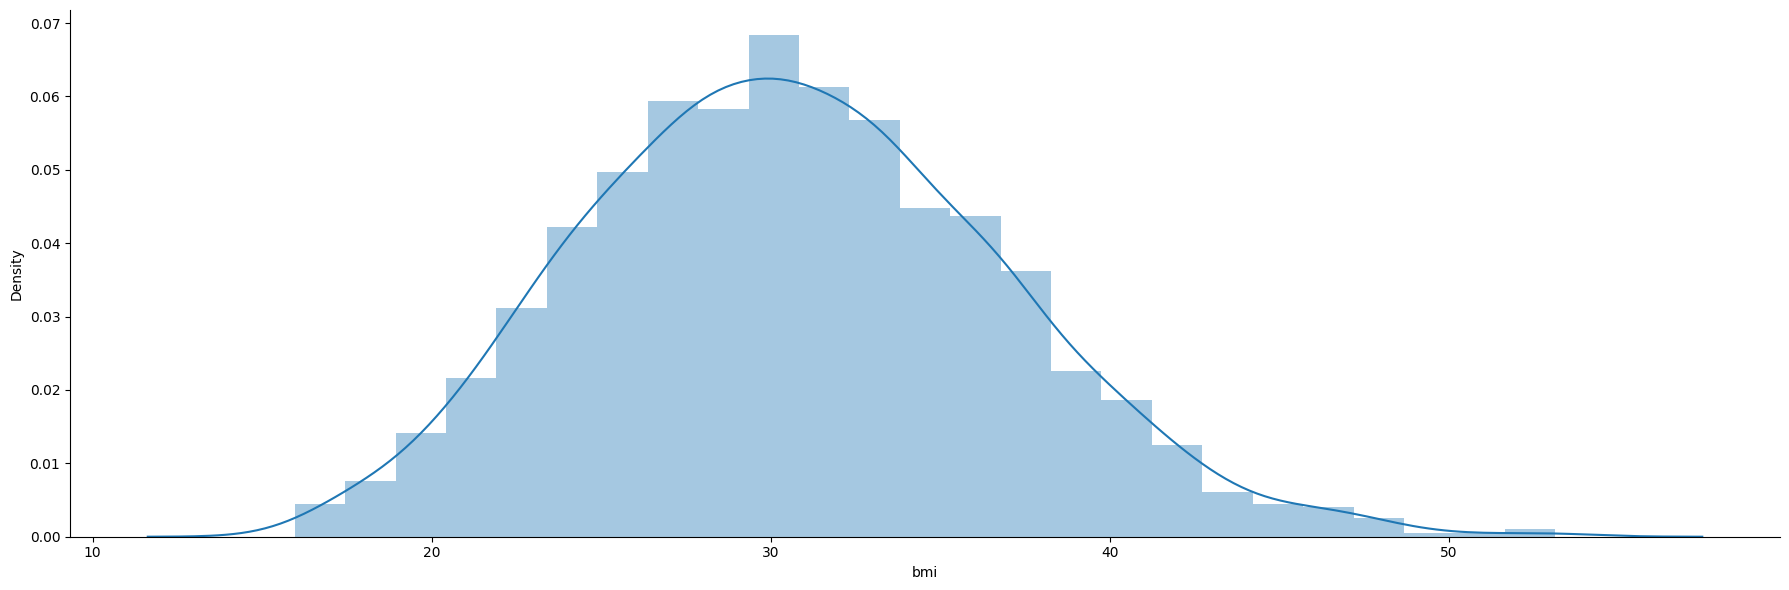

In [22]:
sns.FacetGrid(training_data,height=6,aspect=3).map(sns.distplot,"bmi")
plt.show()

In [23]:
def sample_mean_distribution(data, samples_count, data_points_count):
    #list to append all samples
    samples_list = list()
    #data in array
    data = np.array(data.values)
    for i in range(0, samples_count):
        samples = random.sample(range(0, data.shape[0]), data_points_count)
        samples_list.append(data[samples].mean())
    #return array of sample mean
    return np.array(samples_list)

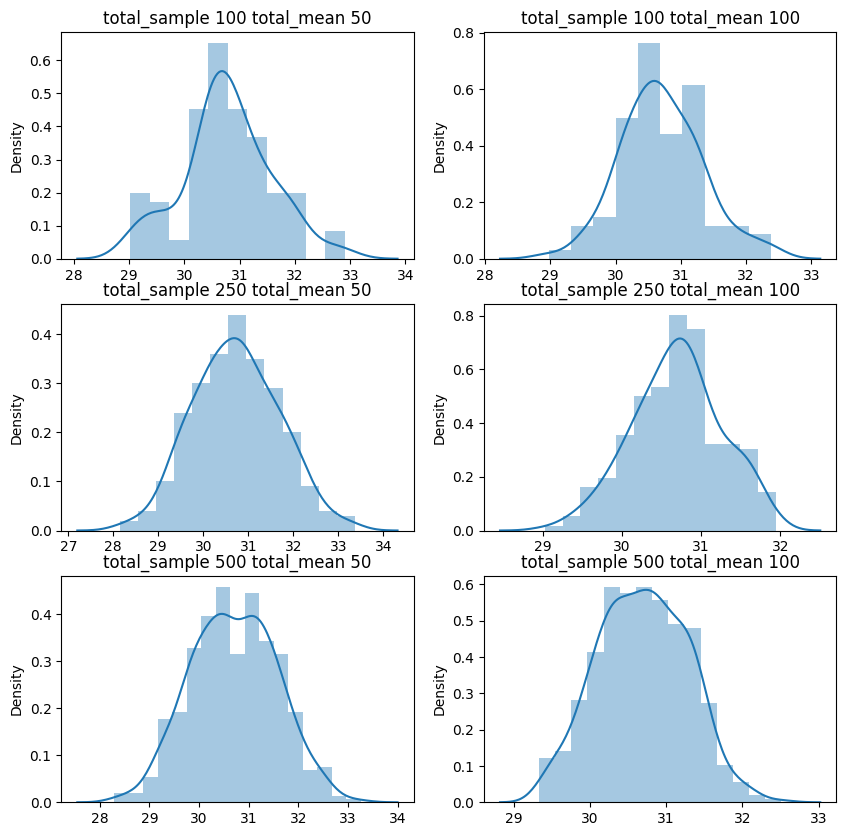

In [24]:
cnt = 0
sample_mean = list()
#setting figures
fg, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
#list of samples and datapoints combinations
lst = [(100,50),(100,100),(250,50),(250,100),(500,50),(500,100)]
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_title("total_sample " + str(lst[cnt][0]) + " total_mean " + str(lst[cnt][1]))
        sns.distplot(sample_mean_distribution(training_data["bmi"], lst[cnt][0],lst[cnt][1]),ax = ax[i,j])
        sample_mean.append(sample_mean_distribution(training_data["bmi"], lst[cnt][0],lst[cnt][1]))
        cnt +=1

In [26]:
#calculating output
def sample_output(data, population_mean, population_sd,total_sample_points_list):
    df = pd.DataFrame()
    mean_sample = list(); std_sample = list(); std_approx = list(); strings_list = list()
    pop_mean = list(); pop_std = list()
    #calculating sample values
    for idx, val in enumerate(data):
        pop_mean.append(round(population_mean,2))
        pop_std.append(round(population_sd,2))
        mean_sample.append(round(val.mean(),2))
        std_sample.append(round(val.std(),2))
        std_approx.append(round(population_sd/np.sqrt((total_sample_points_list[idx][1])),2))
        strings_list.append("total_sample_" + str(total_sample_points_list[idx][0]) + "_total_mean_"
                            + str(total_sample_points_list[idx][1]))
    df["name"] = pd.Series(strings_list); df["bmi_mean"] = pd.Series(pop_mean)
    df["sample_mean"] = pd.Series(mean_sample); df["bmi_std"] = pd.Series(pop_std)
    df["sample_std"] = pd.Series(std_sample); df["bmi_std"] = pd.Series(std_approx)

    return df

In [27]:
output_df = sample_output(sample_mean, mean_pop, std_pop,lst)
output_df

,name,bmi_mean,sample_mean,bmi_std,sample_std
0,total_sample_100_total_mean_50,30.66,30.52,0.86,0.86
1,total_sample_100_total_mean_100,30.66,30.62,0.61,0.63
2,total_sample_250_total_mean_50,30.66,30.61,0.86,0.86
3,total_sample_250_total_mean_100,30.66,30.67,0.61,0.57
4,total_sample_500_total_mean_50,30.66,30.65,0.86,0.89
5,total_sample_500_total_mean_100,30.66,30.64,0.61,0.57


In [29]:
ptable = prettytable.PrettyTable(["sample_mean"+u"\u2248"+"orig_mean", "sample_std"+u"\u2248"+"approx_std"])
for i in range(0, len(output_df)):
    row = list()
    row.append(str(output_df["sample_mean"][i])+u"\u2248"+str(output_df["bmi_mean"][i]))
    row.append(str(output_df["sample_std"][i])+u"\u2248"+str(output_df["bmi_std"][i]))
    ptable.add_row(row)
print(ptable)

+-----------------------+-----------------------+
| sample_mean≈orig_mean | sample_std≈approx_std |
+-----------------------+-----------------------+
|      30.52≈30.66      |       0.86≈0.86       |
|      30.62≈30.66      |       0.63≈0.61       |
|      30.61≈30.66      |       0.86≈0.86       |
|      30.67≈30.66      |       0.57≈0.61       |
|      30.65≈30.66      |       0.89≈0.86       |
|      30.64≈30.66      |       0.57≈0.61       |
+-----------------------+-----------------------+


In [31]:
"""getting lower and upper limit of 95% confidence interval with known standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["bmi_std"][i])*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["bmi_std"][i])*1.96); upper_lim.append(round(upper_limit,2))

#appending values into the dataset
output_df["lower_limit"] = pd.Series(lower_lim)
output_df["upper_limit"] = pd.Series(upper_lim)

In [32]:
output_df

,name,bmi_mean,sample_mean,bmi_std,sample_std,lower_limit,upper_limit
0,total_sample_100_total_mean_50,30.66,30.52,0.86,0.86,28.83,32.21
1,total_sample_100_total_mean_100,30.66,30.62,0.61,0.63,29.42,31.82
2,total_sample_250_total_mean_50,30.66,30.61,0.86,0.86,28.92,32.30
3,total_sample_250_total_mean_100,30.66,30.67,0.61,0.57,29.47,31.87
4,total_sample_500_total_mean_50,30.66,30.65,0.86,0.89,28.96,32.34
5,total_sample_500_total_mean_100,30.66,30.64,0.61,0.57,29.44,31.84


In [33]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); upper_lim.append(round(upper_limit,2))
#appending values into the dataset
output_df["lower_limit_wt_sd"] = pd.Series(lower_lim)
output_df["upper_limit_wt_sd"] = pd.Series(upper_lim)

In [34]:
output_df

,name,bmi_mean,sample_mean,bmi_std,sample_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd
0,total_sample_100_total_mean_50,30.66,30.52,0.86,0.86,28.83,32.21,30.28,30.76
1,total_sample_100_total_mean_100,30.66,30.62,0.61,0.63,29.42,31.82,30.50,30.74
2,total_sample_250_total_mean_50,30.66,30.61,0.86,0.86,28.92,32.30,30.37,30.85
3,total_sample_250_total_mean_100,30.66,30.67,0.61,0.57,29.47,31.87,30.56,30.78
4,total_sample_500_total_mean_50,30.66,30.65,0.86,0.89,28.96,32.34,30.40,30.90
5,total_sample_500_total_mean_100,30.66,30.64,0.61,0.57,29.44,31.84,30.53,30.75


In [35]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    upper_lim.append(round(upper_limit,2))
#appending values into the dataset
output_df["lower_limit_99"] = pd.Series(lower_lim)
output_df["upper_limit_99"] = pd.Series(upper_lim)

In [36]:
output_df

,name,bmi_mean,sample_mean,bmi_std,sample_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd,lower_limit_99,upper_limit_99
0,total_sample_100_total_mean_50,30.66,30.52,0.86,0.86,28.83,32.21,30.28,30.76,30.21,30.83
1,total_sample_100_total_mean_100,30.66,30.62,0.61,0.63,29.42,31.82,30.50,30.74,30.46,30.78
2,total_sample_250_total_mean_50,30.66,30.61,0.86,0.86,28.92,32.30,30.37,30.85,30.30,30.92
3,total_sample_250_total_mean_100,30.66,30.67,0.61,0.57,29.47,31.87,30.56,30.78,30.52,30.82
4,total_sample_500_total_mean_50,30.66,30.65,0.86,0.89,28.96,32.34,30.40,30.90,30.33,30.97
5,total_sample_500_total_mean_100,30.66,30.64,0.61,0.57,29.44,31.84,30.53,30.75,30.49,30.79


Histogram of Price Range


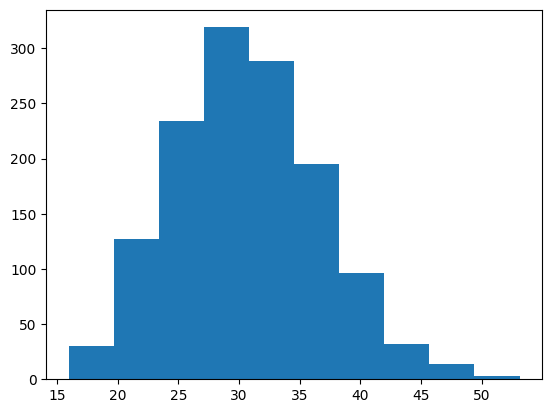

In [38]:
print ('Histogram of Price Range')
pyplot.hist(training_data['bmi'])
pyplot.show()

Histogram of Price Range


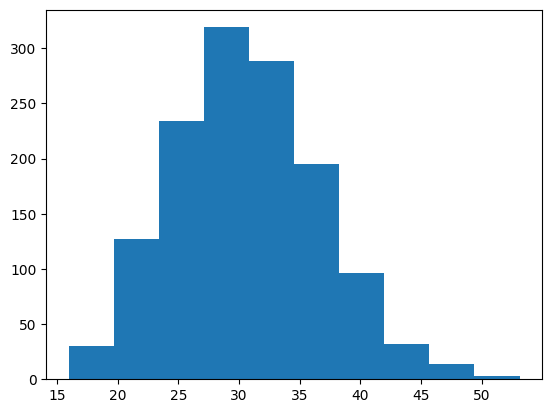

In [39]:
print ('Histogram of Price Range')
pyplot.hist(training_data['bmi'])
pyplot.show()

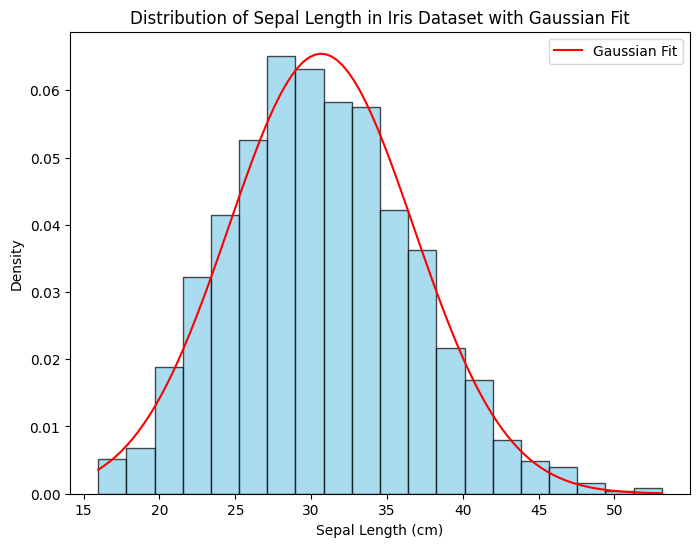

In [40]:
import matplotlib.pyplot as plt
import numpy as np

clock_speed = training_data['bmi']

mu, std = np.mean(clock_speed), np.std(clock_speed)
x = np.linspace(np.min(clock_speed), np.max(clock_speed), 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std)**2)

plt.figure(figsize=(8, 6))
plt.hist(clock_speed, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.plot(x, y, color='red', label='Gaussian Fit')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.title('Distribution of Sepal Length in Iris Dataset with Gaussian Fit')
plt.legend()
plt.show()

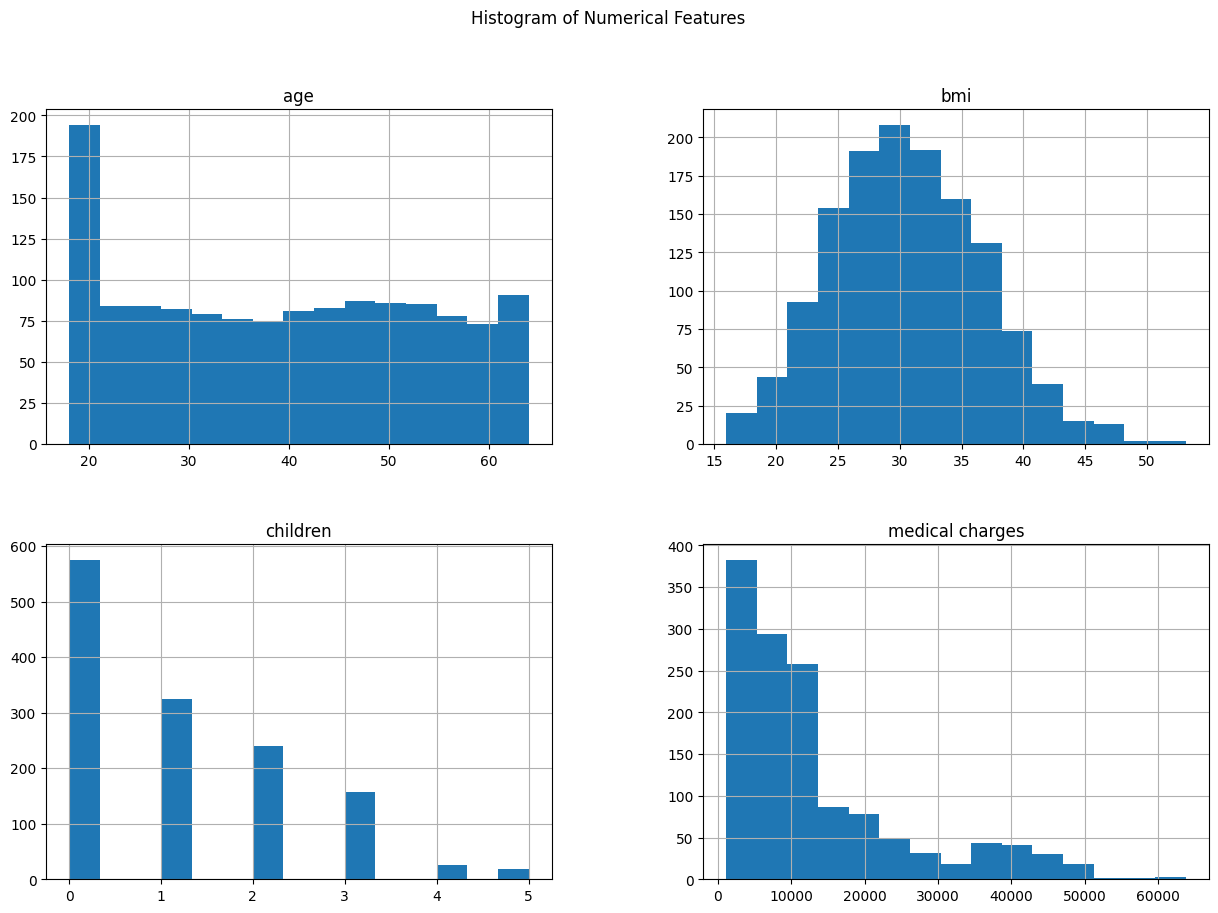

In [41]:
# Histogram of numerical features
training_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features")
plt.show()

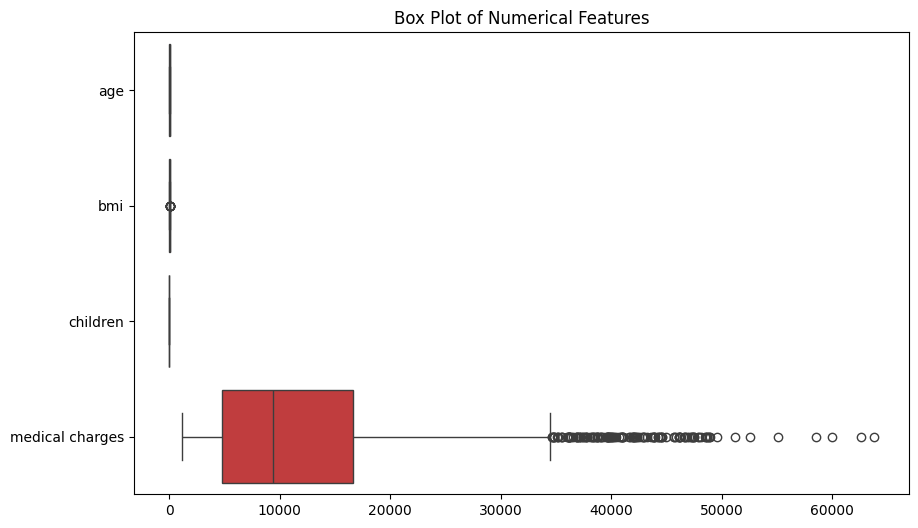

In [42]:
# Box plot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data, orient="h")
plt.title("Box Plot of Numerical Features")
plt.show()

In [52]:
# Convert relevant columns to numeric type
numeric_columns = ['age', 'bmi', 'children']  # Removed 'gender' as it's likely categorical

# Check if columns exist in DataFrame and convert to numeric
for col in numeric_columns:
    if col in training_data.columns:
        training_data[col] = pd.to_numeric(training_data[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Detect outliers using the IQR method on numeric columns only
Q1 = training_data[numeric_columns].quantile(0.25)  # Calculate Q1 for numeric columns
Q3 = training_data[numeric_columns].quantile(0.75)  # Calculate Q3 for numeric columns
IQR = Q3 - Q1

# Filter out outliers (considering only numeric columns for outlier detection)
data_outliers_removed = training_data[~((training_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (training_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Number of rows before removing outliers: {training_data.shape[0]}')
print(f'Number of rows after removing outliers: {data_outliers_removed.shape[0]}')

Number of rows before removing outliers: 1338
Number of rows after removing outliers: 1329


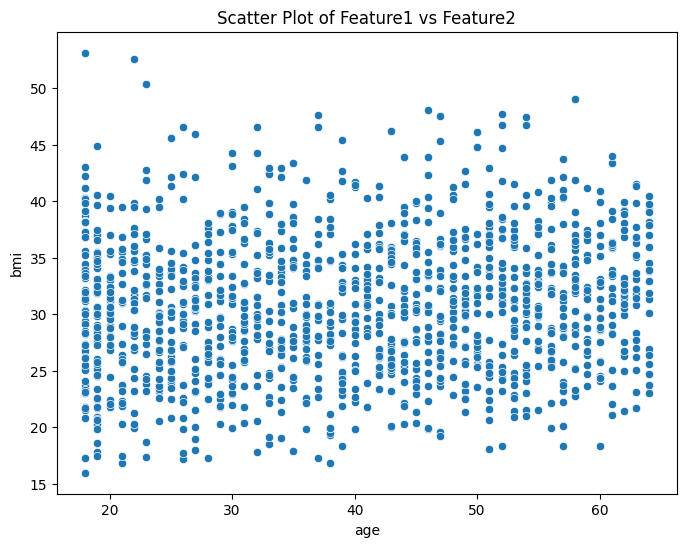

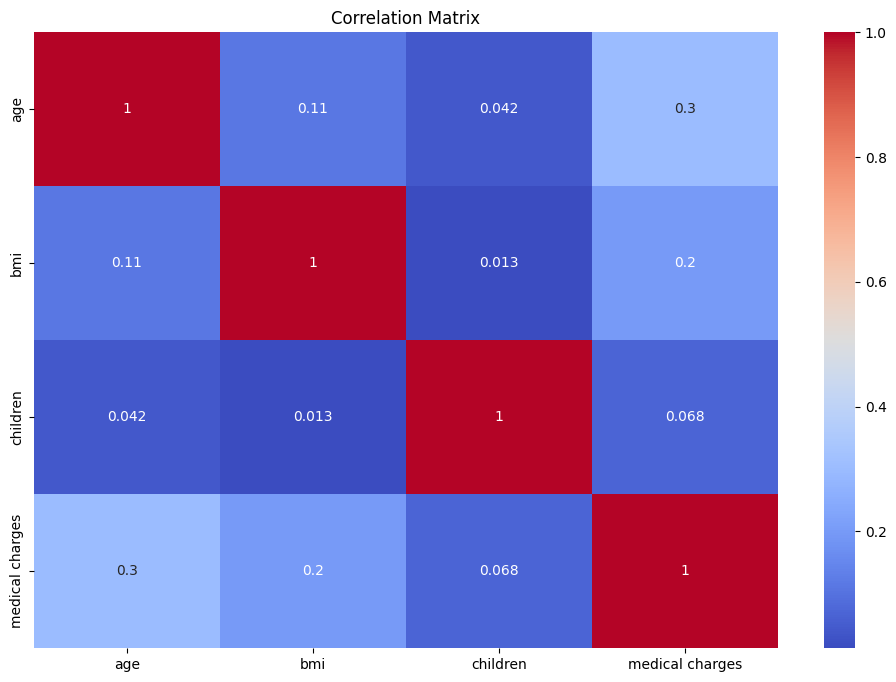

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Scatter plot for two numerical variables
plt.figure(figsize=(8, 6))
# Verify the correct column name for 'gender' in your DataFrame.
# If it's different, replace 'gender' below with the actual name.
sns.scatterplot(data=training_data, x='age', y='bmi')  # Changed 'gender' to 'sex'
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.show()

# Convert relevant columns to numeric type
numeric_columns = ['age', 'bmi', 'children']  # Removed 'gender' as it's likely categorical

# Check if columns exist in DataFrame and convert to numeric
for col in numeric_columns:
    if col in training_data.columns:
        training_data[col] = pd.to_numeric(training_data[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Select only numeric columns for correlation calculation
numeric_data = training_data.select_dtypes(include=np.number)

# Correlation matrix
correlation_matrix = numeric_data.corr() # Finish typing the variable name
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

age
Skew : 0.06


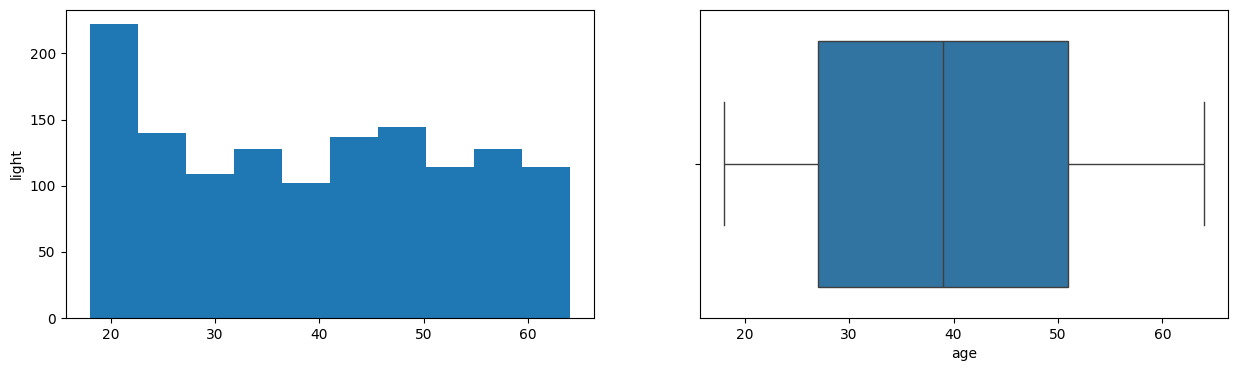

bmi
Skew : 0.28


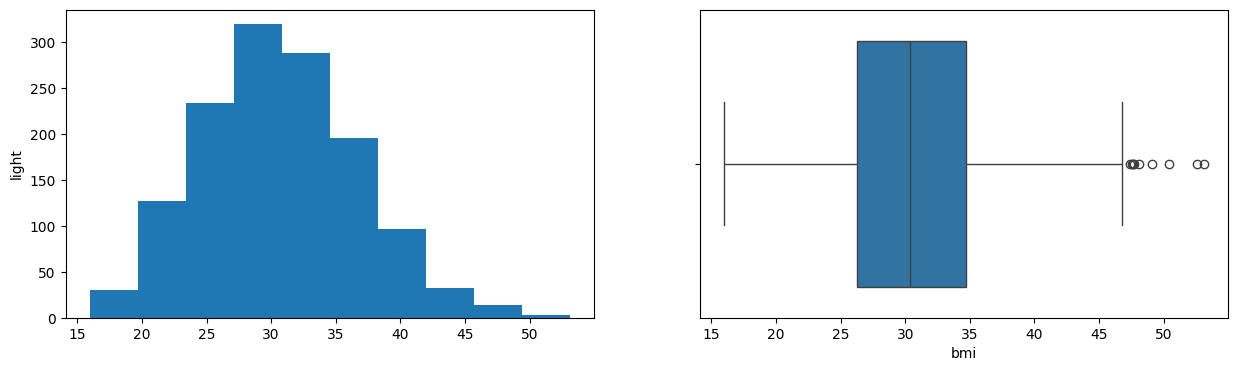

children
Skew : 0.94


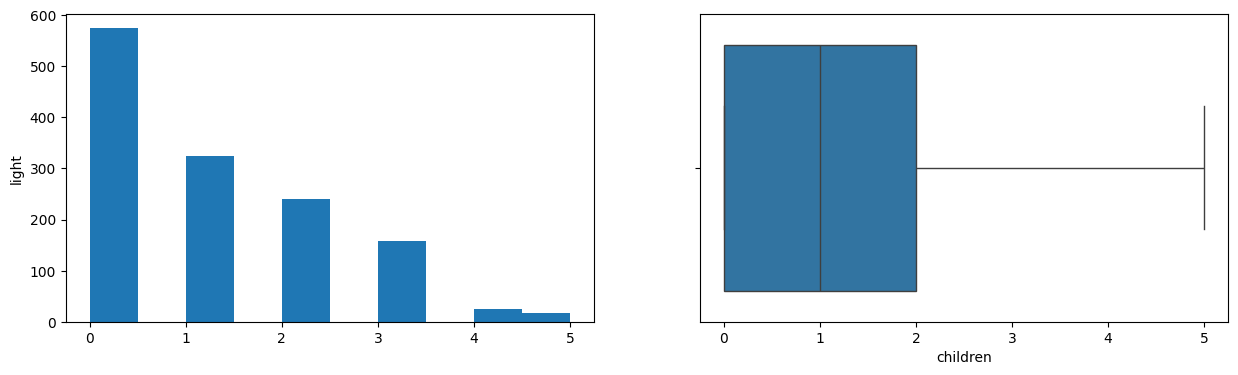

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define num_cols with the list of numerical columns
num_cols = ['age', 'bmi', 'children']  # Add other numerical columns if needed

for col in num_cols:
    print(col)
    print('Skew :', round(training_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    training_data[col].hist(grid=False)
    plt.ylabel('light')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=training_data[col])
    plt.show()

In [64]:
# colors
facies_colors = ['xkcd:goldenrod', 'xkcd:orange','xkcd:sienna','xkcd:violet',
       'xkcd:olive','xkcd:turquoise', "xkcd:yellowgreen", 'xkcd:indigo', 'xkcd:blue']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh',
                 'MS',  'WS', 'D','PS', 'BS']

#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

# Example usage:
print(facies_color_map['SS'])  # Output: xkcd:goldenrod


xkcd:goldenrod


In [67]:
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_data = training_data.select_dtypes(include='number')

# Calculate the correlation matrix on numeric data
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                      age       bmi  children  medical charges
age              1.000000  0.109272  0.042469         0.299008
bmi              0.109272  1.000000  0.012759         0.198341
children         0.042469  0.012759  1.000000         0.067998
medical charges  0.299008  0.198341  0.067998         1.000000


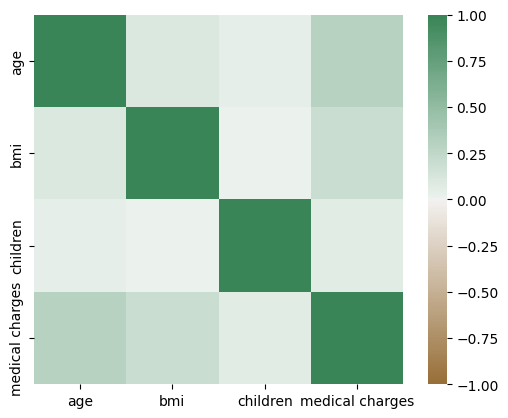

In [69]:
#import matplotlib.pyplot as plt
#import seaborn as sns
correlation_matrix = numeric_data.corr()

axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

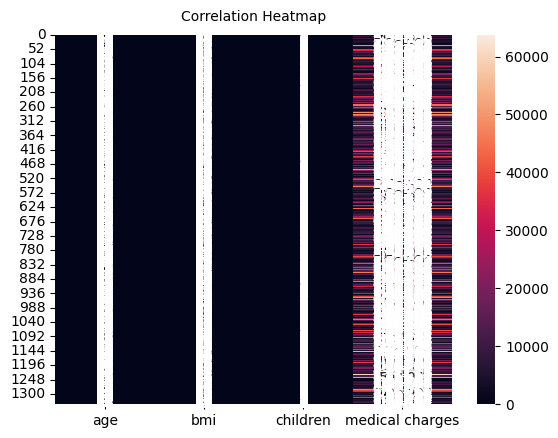

In [71]:
heatmap = sns.heatmap(numeric_data, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10)

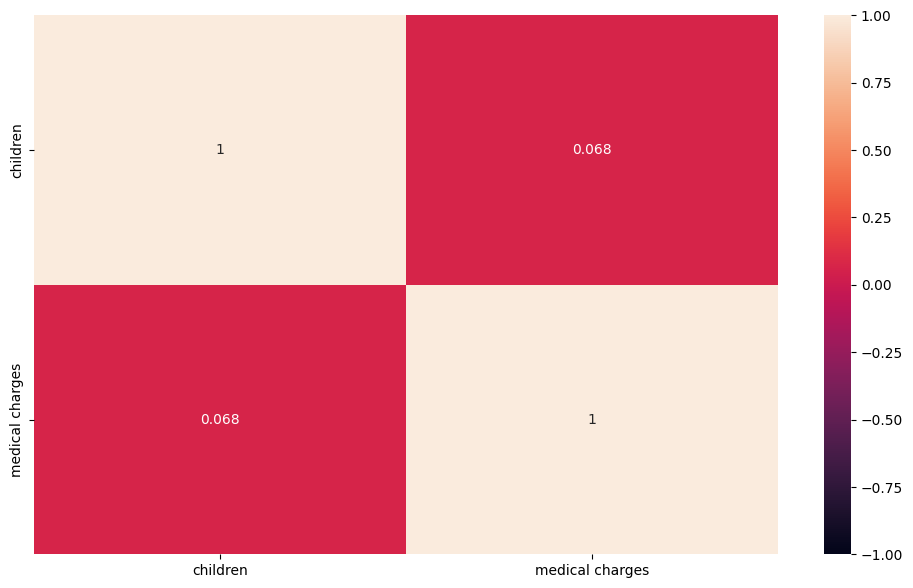

In [73]:
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_data.drop(['bmi','age'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

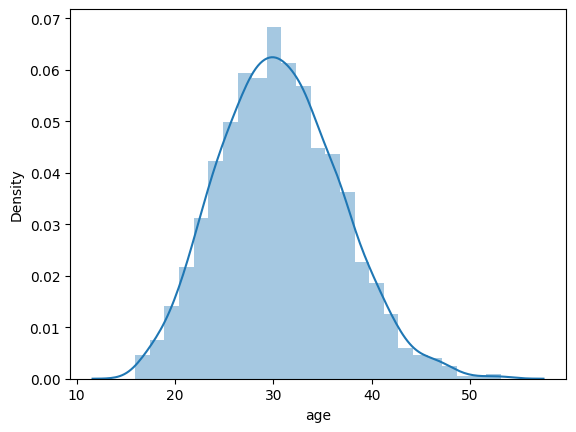

In [75]:

sns.distplot(training_data["bmi"], axlabel="age");


<Figure size 1300x1700 with 0 Axes>

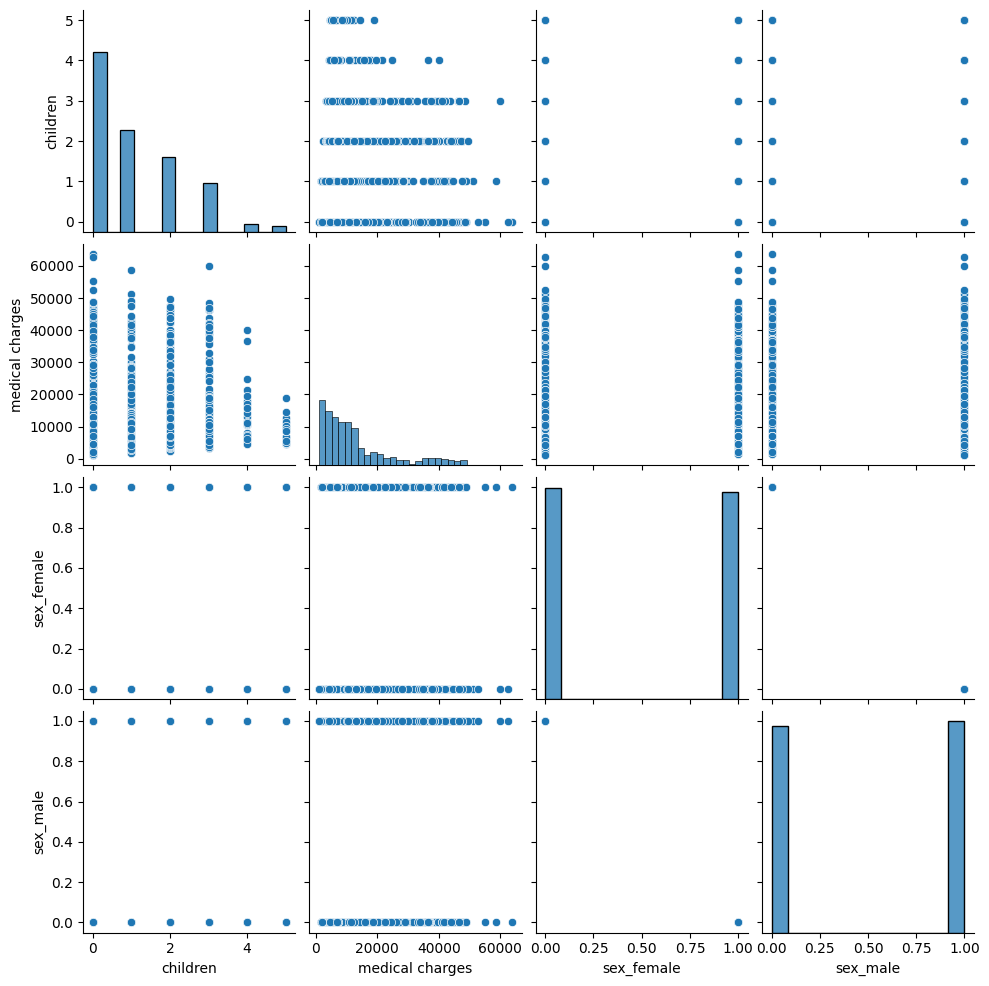

In [76]:
plt.figure(figsize=(13,17))
sns.pairplot(data=training_data.drop(['age','bmi'],axis=1))
plt.show()